In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [4]:
# 첫 번째! info()
# category : 일반적인 문자 데이터는 object 
# 종류가(문자열이) 몇개없는 데이터는 category로 정해놓으면 편하다.
# rename, astype
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [90]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [94]:
tips.sex.value_counts().loc['Male']

157

In [92]:
tips.sex.value_counts().iloc[0]

157

In [97]:
tips.sex.nunique()

2

In [ ]:
# 카테고리 추가
tips.sex.cat.add_categories()

In [98]:
# 카테고리 개수 (0은 남자 , 1은 여자) - label incoding
tips.sex.cat.codes

0      1
1      0
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      0
10     0
11     1
12     0
13     0
14     1
15     0
16     1
17     0
18     1
19     0
20     0
21     1
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     1
      ..
214    1
215    1
216    0
217    0
218    0
219    1
220    0
221    1
222    0
223    1
224    0
225    1
226    1
227    0
228    0
229    1
230    0
231    0
232    0
233    0
234    0
235    0
236    0
237    0
238    1
239    0
240    1
241    0
242    0
243    1
Length: 244, dtype: int8

In [100]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

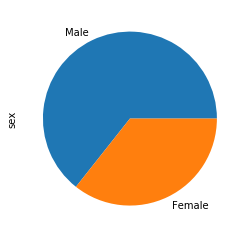

In [96]:
tips.sex.value_counts().plot.pie()

In [5]:
# describe() 는 숫자 데이터만 표현해준다! (더 보고 싶으면 괄호 안에 include 를 써라)
# mean : 평균
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

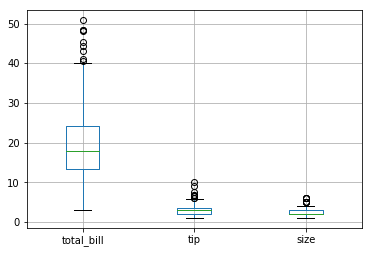

In [6]:
tips.boxplot()

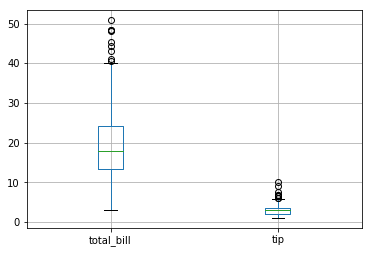

In [7]:
tips[['total_bill', 'tip']].boxplot()

In [8]:
# 성별로 묶기 (mean 평균값)
tips.groupby('sex').mean()

total_bill       tip      size
sex                                   
Male     20.744076  3.089618  2.630573
Female   18.056897  2.833448  2.459770

In [9]:
# 성별로 묶기 (sum 합계)
tips.groupby('sex').sum()

total_bill     tip  size
sex                             
Male       3256.82  485.07   413
Female     1570.95  246.51   214

In [11]:
# 날짜로 묶기 (max 최대값)
tips.groupby('day').max()

total_bill    tip  size
day                          
Thur       43.11   6.70     6
Fri        40.17   4.73     4
Sat        50.81  10.00     5
Sun        48.17   6.50     6

In [12]:
tips.groupby(['sex','day']).mean()

total_bill       tip      size
sex    day                                 
Male   Thur   18.714667  2.980333  2.433333
       Fri    19.857000  2.693000  2.100000
       Sat    20.802542  3.083898  2.644068
       Sun    21.887241  3.220345  2.810345
Female Thur   16.715312  2.575625  2.468750
       Fri    14.145556  2.781111  2.111111
       Sat    19.680357  2.801786  2.250000
       Sun    19.872222  3.367222  2.944444

In [16]:
t = tips.groupby(['sex'])['total_bill','tip'].mean()

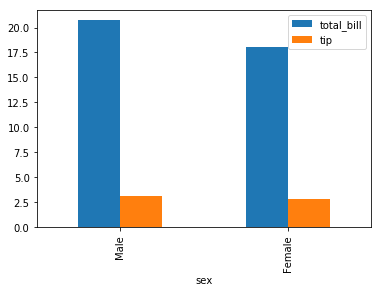

In [17]:
t.plot.bar()

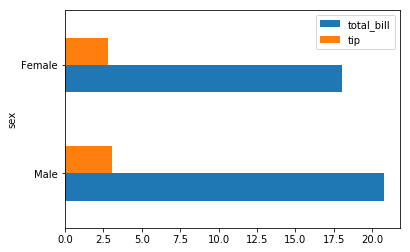

In [20]:
t.plot.barh()

---------------------------

## 공공데이터 불러올 때 incoding error 가 잘 난다!

In [22]:
import pandas as pd

In [41]:
# olds = pd.read_csv('C:/Users/cdetg/AppData/Roaming/SPB_Data/sample.csv',
#                    index_col = '연번', engine='python', encoding='cp949')

olds = pd.read_csv('C:/Users/cdetg/AppData/Roaming/SPB_Data/sample.csv', engine='python', encoding='cp949')
# 불러들일 때부터 index 정하기 : index_col
# set_index : 인덱스를 두 개 이상 붙일 때(multi index)

In [42]:
# 원본을 안전하게 보관해놓기
olds_raw = olds.copy()

In [34]:
olds.set_index('연번', inplace=True)

In [35]:
olds

경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  남자회원  \
연번                                                                              
1         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
2    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
3       홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41     9   
4        황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40    10   
5       홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31     0   
6         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
7       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
8         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
9         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
10        삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
11      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
12      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
13        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
14     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
15      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
16        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
17       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
18      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
19        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
20        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
21        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
22       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
23        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
24      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
25        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
26       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
27        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
28        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
29        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
30        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
..          ...                              ...      ...     ...   ...   ...   
52        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
53        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
54        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
55        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
56        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
57    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
58    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
59      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
60        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
61        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
62      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
63        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
64       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
65      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
66      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
67        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
68    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리

In [36]:
# rangeIndex 에서 Int64Index로 바뀌었다.
# 인덱스를 지우면 효과적이다.
olds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1 to 81
Data columns (total 9 columns):
경로당명칭    81 non-null object
소재지      81 non-null object
부지(㎡)    81 non-null float64
건물(㎡)    81 non-null float64
회원총계     81 non-null int64
남자회원     81 non-null int64
여자회원     81 non-null int64
전화번호     81 non-null object
기준일자     81 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 6.3+ KB


In [39]:
olds.reset_index(drop=True, inplace =True)

In [40]:
olds

경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  남자회원  \
0         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
1    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
2       홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41     9   
3        황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40    10   
4       홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31     0   
5         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
6       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
7         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
8         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
9         삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
10      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
11      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
12        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
13     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
14      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
15        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
16       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
17      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
18        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
19        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
20        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
21       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
22        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
23      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
24        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
25       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
26        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
27        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
28        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
29        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
..          ...                              ...      ...     ...   ...   ...   
51        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
52        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
53        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
54        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
55        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
56    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
57    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
58      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
59        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
60        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
61      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
62        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
63       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
64      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
65      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
66        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
67    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22     7   
68       꽃동네경로당          대구광역시 서구 평리로 221

-------------------

In [45]:
olds.drop(columns='연번', inplace=True)

In [46]:
olds

경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  남자회원  \
0         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
1    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
2       홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41     9   
3        황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40    10   
4       홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31     0   
5         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
6       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
7         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
8         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
9         삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
10      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
11      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
12        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
13     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
14      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
15        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
16       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
17      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
18        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
19        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
20        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
21       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
22        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
23      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
24        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
25       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
26        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
27        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
28        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
29        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
..          ...                              ...      ...     ...   ...   ...   
51        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
52        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
53        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
54        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
55        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
56    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
57    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
58      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
59        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
60        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
61      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
62        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
63       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
64      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
65      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
66        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
67    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22     7   
68       꽃동네경로당          대구광역시 서구 평리로 221

In [47]:
# 필요없는 데이터 지울 수 있다.
# label 하고 column 은 axis 없이 지울 수 있다.
# axis를 넣는다면? 
olds.drop(labels=[2,3,4,])

경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  남자회원  \
0         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
1    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
5         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
6       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
7         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
8         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
9         삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
10      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
11      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
12        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
13     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
14      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
15        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
16       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
17      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
18        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
19        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
20        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
21       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
22        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
23      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
24        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
25       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
26        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
27        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
28        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
29        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
30        동흔경로당           대구광역시 서구 국채보상로76길 27-1   145.00   62.98    30     2   
31        일구경로당               대구광역시 서구 평리로85길 15   155.00   83.46    36     1   
32      비산우방경로당        대구광역시 서구 통학로24길 60 비산우방맨션   100.00  100.00    28    12   
..          ...                              ...      ...     ...   ...   ...   
51        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
52        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
53        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
54        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
55        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
56    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
57    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
58      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
59        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
60        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
61      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
62        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
63       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
64      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
65      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
66        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
67    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22     7   
68       꽃동네경로당          대구광역시 서구 평리로 221

In [49]:
olds.drop(labels='소재지', axis=1)

경로당명칭    부지(㎡)   건물(㎡)  회원총계  남자회원  여자회원          전화번호        기준일자
0         내서경로당   139.80  160.80    40     0    40  053-554-0739  2017-11-10
1    시영내당(아)경로당   119.00  119.00    24     6    18  053-567-9772  2017-11-10
2       홍실1차경로당    90.00   90.00    41     9    32  053-551-8286  2017-11-10
3        황성정경로당   134.74  134.74    40    10    30  053-553-9874  2017-11-10
4       홍실2차경로당   154.11  154.11    31     0    31  053-556-8220  2017-11-10
5         장수경로당   159.00  112.00    38     5    33  053-572-8123  2017-11-10
6       내당2동경로당    93.00   62.64    35    10    25  053-571-1637  2017-11-10
7         내당경로당   216.00  183.68    40     5    35  053-565-0437  2017-11-10
8         천일경로당   165.00  172.84    17     2    15  053-566-3077  2017-11-10
9         삼화경로당   130.00  136.02    30     5    25  053-565-5084  2017-11-10
10      삼익맨션경로당   109.09  109.09    25     0    25  053-567-7765  2017-11-10
11      광장타운경로당    76.00   76.00    38     4    34  053-563-3087  2017-11-10
12        명우경로당    49.60   49.60    24     5    19  053-558-5006  2017-11-10
13     삼익뉴타운경로당    66.00  132.00    45    13    32  053-562-1237  2017-11-10
14      내당4동경로당   142.00   60.10    39    23    16  053-562-4594  2017-11-10
15        내우경로당   169.50  148.51    27     0    27  053-564-4346  2017-11-10
16       코오롱경로당    29.75   29.75    22     0    22  053-552-5293  2017-11-10
17      동화타운경로당    40.48   40.48    29    14    15  053-558-0504  2017-11-10
18        웰빙경로당    34.20   34.20    60     0    60  053-523-3210  2017-11-10
19        당산경로당   165.00  180.55    37    12    25  053-565-9636  2017-11-10
20        원상경로당   158.00  163.27    64    31    33  053-551-3383  2017-11-10
21       만수정경로당    18.54   18.54    25     5    20  053-552-8812  2017-11-10
22        거창경로당   251.00  185.44    51    17    34  053-565-5555  2017-11-10
23      비산1동경로당   124.00  146.20    30     8    22  053-553-0968  2017-11-10
24        비룡경로당   218.00  126.65    30    22     8  053-564-2265  2017-11-10
25       인동촌경로당   483.00   80.25    25    25     0  053-555-6555  2017-11-10
26        달성경로당   129.00  138.56    20     0    20  053-554-0174  2017-11-10
27        모범경로당   238.00  272.40    40    25    15  053-558-9819  2017-11-10
28        장수경로당    39.54   39.54    25     0    25          전화없음  2017-11-10
29        상록경로당   201.00  163.30    44     2    42  053-571-2901  2017-11-10
..          ...      ...     ...   ...   ...   ...           ...         ...
51        평리경로당   215.00   94.87    24     0    24  053-551-9076  2017-11-10
52        만수경로당    26.44   26.44    22     0    22  053-562-1842  2017-11-10
53        청수경로당   118.70  120.40    55     5    50  053-554-2867  2017-11-10
54        평광경로당   183.90  108.86    37    20    17  053-561-0608  2017-11-10
55        장수경로당   165.80  151.46    56    21    35  053-559-1369  2017-11-10
56    평리청구타운경로당   100.00  100.00    31     1    30  053-563-8824  2017-11-10
57    평리푸르지오경로당    79.00   79.00    60    20    40  053-522-0095  2017-11-10
58      평리5동경로당  1293.30  210.20    46     0    46  053-562-7017  2017-11-10
59        도기경로당   191.30  113.66    54     5    49  053-566-4363  2017-11-10
60        광명경로당   140.40  140.40    30     1    29  053-557-0085  2017-11-10
61      평리6동경로당   174.40  185.69    43    14    29  053-561-3717  2017-11-10
62        복지경로당    63.66   63.66    40    13    27  053-566-7559  2017-11-10
63       새동네경로당   157.00  167.85    35     5    30  053-563-9259  2017-11-10
64      상리1동경로당   233.00  256.08    59    10    49  053-563-2110  2017-11-10
65      상리2동경로당   243.00  263.90    42     8    34  053-555-0977  2017-11-10
66        이현경로당   324.00  136.00    30    11    19  053-554-5147  2017-11-10
67    중리시영2차경로당    35.07   35.07    22     7    18  053-565-2569  2017-11-10
68       꽃동네경로당    50.08   50.08    37     5    32  053-558-0512  2017-11-10
69       두견화경로당    42.69   42.69    20     0    20  053-555-0127  2017-11-10
70        중리경로당   583.00  193.80    62    20    42  053-565-7650  2017-11-10
71    

In [50]:
# 다시 원본으로 살리기
olds = olds_raw.copy()

In [53]:
olds.drop('연번',axis=1, inplace=True)

In [72]:
# 소재지 쪼개기
olds.rename({"소재지":"주소"}, axis=1, inplace=True)

In [73]:
olds['시'] = '대구광역시'

In [58]:
olds

경로당명칭                               주소    부지(㎡)   건물(㎡)  회원총계  남자회원  \
0         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
1    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
2       홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41     9   
3        황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40    10   
4       홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31     0   
5         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
6       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
7         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
8         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
9         삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
10      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
11      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
12        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
13     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
14      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
15        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
16       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
17      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
18        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
19        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
20        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
21       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
22        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
23      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
24        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
25       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
26        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
27        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
28        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
29        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
..          ...                              ...      ...     ...   ...   ...   
51        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
52        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
53        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
54        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
55        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
56    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
57    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
58      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
59        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
60        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
61      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
62        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
63       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
64      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
65      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
66        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
67    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22     7   
68       꽃동네경로당          대구광역시 서구 평리로 221

In [59]:
olds['기준일자'].dtype

dtype('O')

In [82]:
olds = olds_raw.copy()

In [68]:
# inplace 가 없기 때문에 재할당 해야 한다.
olds['기준일자'] = olds['기준일자'].astype('datetime64')

-----------------------

In [85]:
pd.to_datetime(olds['기준일자'])

0    2017-11-10
1    2017-11-10
2    2017-11-10
3    2017-11-10
4    2017-11-10
5    2017-11-10
6    2017-11-10
7    2017-11-10
8    2017-11-10
9    2017-11-10
10   2017-11-10
11   2017-11-10
12   2017-11-10
13   2017-11-10
14   2017-11-10
15   2017-11-10
16   2017-11-10
17   2017-11-10
18   2017-11-10
19   2017-11-10
20   2017-11-10
21   2017-11-10
22   2017-11-10
23   2017-11-10
24   2017-11-10
25   2017-11-10
26   2017-11-10
27   2017-11-10
28   2017-11-10
29   2017-11-10
        ...    
51   2017-11-10
52   2017-11-10
53   2017-11-10
54   2017-11-10
55   2017-11-10
56   2017-11-10
57   2017-11-10
58   2017-11-10
59   2017-11-10
60   2017-11-10
61   2017-11-10
62   2017-11-10
63   2017-11-10
64   2017-11-10
65   2017-11-10
66   2017-11-10
67   2017-11-10
68   2017-11-10
69   2017-11-10
70   2017-11-10
71   2017-11-10
72   2017-11-10
73   2017-11-10
74   2017-11-10
75   2017-11-10
76   2017-11-10
77   2017-11-10
78   2017-11-10
79   2017-11-10
80   2017-11-10
Name: 기준일자, Length: 81, 

In [89]:
olds['구'] = '서구'

In [87]:
olds['주소'] = olds['주소'].......